## Analysis Outline - Index of Economic Freedom

This notebook explores clustering with the K-means algorithm.


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Shortening folder path

In [3]:
# Setting up short folder

path = r'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.5'

In [4]:
path

'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.5'

## Importing dataframe

In [5]:
# Importing dataset

df_economic_freedom = pd.read_csv(os.path.join(path, 'economic_freedom.csv'))

## Exploring dataframe


In [6]:
df_economic_freedom.shape

(5152, 19)

In [7]:
df_economic_freedom.head()

,Unnamed: 0,Region,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,0,Americas,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,1,Americas,Barbados,13.193887,-59.543198,2022,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,2,Americas,Belize,17.189877,-88.497650,2022,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,3,Americas,Bolivia,-16.290154,-63.588653,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,4,Americas,Brazil,-14.235004,-51.925280,2022,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


In [8]:
# Adding median values to "Judicial Effectiveness" 

df_economic_freedom['Judicial Effectiveness'].fillna(df_economic_freedom['Judicial Effectiveness'].median(), inplace=True)


In [9]:
# Checking missing values

df_economic_freedom.isnull().sum()

Unnamed: 0                   0
Region                       0
Country                      0
Latitude                     0
Longitude                    0
Index Year                   0
Overall Score                0
Property Rights              0
Government Integrity         0
Judicial Effectiveness       0
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

## Data imputation

In [10]:
# Dropping the index column

df_economic_freedom.drop(df_economic_freedom.columns[0], axis=1, inplace =True)

In [11]:
df_economic_freedom.head()

,Region,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Americas,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,Americas,Barbados,13.193887,-59.543198,2022,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,Americas,Belize,17.189877,-88.497650,2022,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,Americas,Bolivia,-16.290154,-63.588653,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,Americas,Brazil,-14.235004,-51.925280,2022,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


In [12]:
# Dropping categorical and non-useful variables for k-means analysis

df = df_economic_freedom.drop(columns = ['Region', 'Country', 'Latitude', 'Longitude', 'Index Year'])

In [13]:
df.head()

,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


In [14]:
# Checking for missing values

df.isnull().sum()

Overall Score                0
Property Rights              0
Government Integrity         0
Judicial Effectiveness       0
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

In [15]:
# Imputing the missing values for "Overall Score" with the median

df['Overall Score'].fillna(df['Overall Score'].median(), inplace=True)

In [16]:
# Imputing the missing values for "Property Rights" with the median

df['Property Rights'].fillna(df['Property Rights'].median(), inplace=True)

In [17]:
# Imputing the missing values for "Government Integrity" with the median

df['Government Integrity'].fillna(df['Government Integrity'].median(), inplace=True)

In [18]:
# Imputing the missing values for "Judicial Effectiveness" with the median

df['Judicial Effectiveness'].fillna(df['Judicial Effectiveness'].median(), inplace=True)

In [19]:
# Imputing the missing values for "Tax Burden" with the median

df['Tax Burden'].fillna(df['Tax Burden'].median(), inplace=True)

In [20]:
# Imputing the missing values for "Government Spending" with the median

df['Government Spending'].fillna(df['Government Spending'].median(), inplace=True)

In [21]:
# Imputing the missing values for "Fiscal Health" with the median

df['Fiscal Health'].fillna(df['Fiscal Health'].median(), inplace=True)

In [22]:
# Imputing the missing values for "Business Freedom" with the median

df['Business Freedom'].fillna(df['Business Freedom'].median(), inplace=True)

In [23]:
# Imputing the missing values for "Labor Freedom" with the median

df['Labor Freedom'].fillna(df['Labor Freedom'].median(), inplace=True)

In [24]:
# Imputing the missing values for "Monetary Freedom" with the median

df['Monetary Freedom'].fillna(df['Monetary Freedom'].median(), inplace=True)

In [25]:
# Imputing the missing values for "Trade Freedom" with the median

df['Trade Freedom'].fillna(df['Trade Freedom'].median(), inplace=True)

In [26]:
# Imputing the missing values for "Investment Freedom" with the median

df['Investment Freedom'].fillna(df['Investment Freedom'].median(), inplace=True)

In [27]:
# Imputing the missing values for "Financial Freedom" with the median

df['Financial Freedom'].fillna(df['Financial Freedom'].median(), inplace=True)

In [28]:
# Checking for missing values again

df.isnull().sum()

Overall Score             0
Property Rights           0
Government Integrity      0
Judicial Effectiveness    0
Tax Burden                0
Government Spending       0
Fiscal Health             0
Business Freedom          0
Labor Freedom             0
Monetary Freedom          0
Trade Freedom             0
Investment Freedom        0
Financial Freedom         0
dtype: int64

## The elbow technique

In [29]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [30]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-19345253.968530584,
 -13386863.587396435,
 -11278062.236135814,
 -10271795.849395365,
 -9517262.85376454,
 -8916217.881255442,
 -8336730.193038195,
 -7906952.741374922,
 -7585710.143639415]

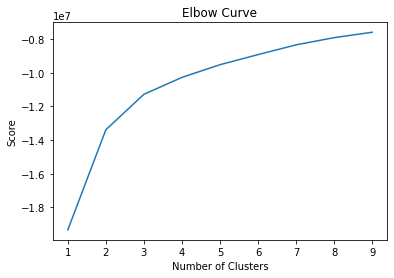

In [31]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve points to 3 clusters being a good fit.

## K-means clustering

In [32]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [33]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [34]:
df['clusters'] = kmeans.fit_predict(df)

In [35]:
# Checking for the clusters

df.head()

,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,clusters
0,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,0
1,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0,2
2,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0,0
3,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0,1
4,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0,0


In [36]:
df['clusters'].value_counts()

0    2765
1    1263
2    1124
Name: clusters, dtype: int64

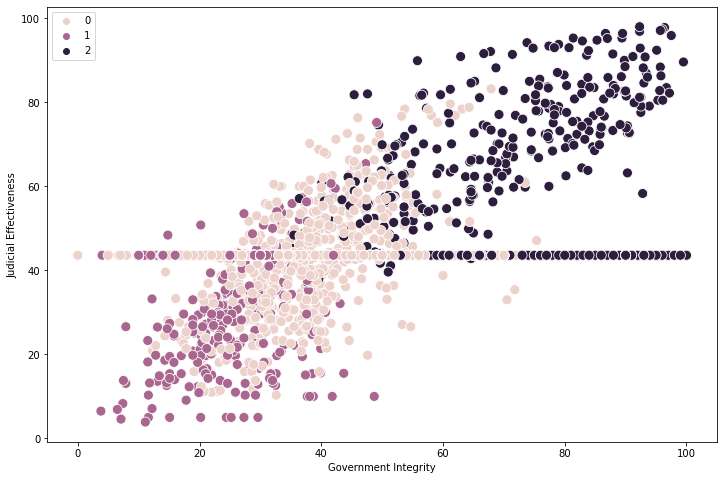

In [37]:
# Plotting the clusters for the "Government Integrity" and "Judicial Effectiveness" variables.
# These variables showed the strongest correlation in the data exploration.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Government Integrity'], y=df['Judicial Effectiveness'], hue=kmeans.labels_, s=100) 
# Here, Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Government Integrity') # Label x-axis.
plt.ylabel('Judicial Effectiveness') # Label y-axis.
plt.show()

This scatter plot with cluster analysis makes sense. 
The plots show that there is a slightly linear trend when higher the "Government Integrity", the higher is the "Judicial Effectiveness". 

The clustering also shows that: 
1. there are many observations where the "Government Integrity" scores are high and the "Judicial Effectiveness" are also high. And when the "Government Integrity" scores are low (dark dots), the "Judicial Effectiveness" scores are also low. 


2. There is one observation where the "Judicial Effectiveness" is almost close to 80 (high score), but the "Government Integrity" is relatively in the middle with value of 50. And another score for the "Judicial Effectiveness" with value of 10 (very low) and the "Government Integrity" score is in the middle with value of 50.


The data shows that although "Government Integrity" and "Judicial Effectiveness" are strongly correlated. So the hypothesis I developed previously, "The higher the scoring for "Government Integrity", the higher the "Judicial Effectiveness" for an Economic Freedom of a country is can be veryfied with this analysis.

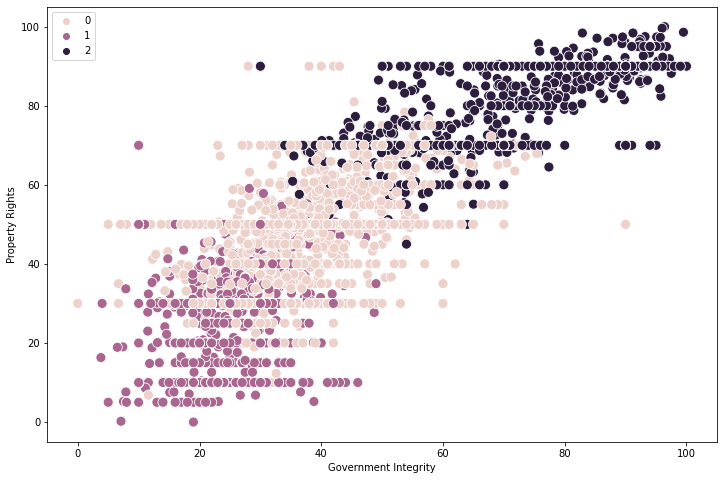

In [38]:
# Plotting the clusters for the "Government Integrity" and "Property Rights" variables.
# These variables showed a strongest correlation in the data exploration in the task 6.2.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Government Integrity'], y=df['Property Rights'], hue=kmeans.labels_, s=100) 
# Here, Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Government Integrity') # Label x-axis.
plt.ylabel('Property Rights') # Label y-axis.
plt.show()

All the three clusters are present and this also show some associations, but there are many of them that doesn't make a lot of sense. The analysis of these "Government Integrity" and "Judicial Effectiveness" responds better my hypotheses stated previously.

In [39]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'


In [40]:
pd.options.display.max_rows = None
df.groupby('cluster').agg({'Overall Score':['mean', 'median'], 
                         'Property Rights':['mean', 'median'], 
                         'Government Integrity':['mean', 'median'],
                           'Judicial Effectiveness' :['mean', 'median'],
                           'Tax Burden' :['mean', 'median'],
                           'Government Spending':['mean', 'median'],
                           'Fiscal Health' :['mean', 'median'],
                           'Business Freedom':['mean', 'median'],
                           'Labor Freedom' :['mean', 'median'],
                           'Monetary Freedom' :['mean', 'median'],
                           'Trade Freedom' :['mean', 'median'],
                           'Investment Freedom' :['mean', 'median'],
                           'Financial Freedom' :['mean', 'median']})                           

Overall Score        Property Rights        Government Integrity  \
                     mean median            mean median                 mean   
cluster                                                                        
dark purple     72.013612  71.85       80.947242   86.6            72.323843   
pink            60.668897  59.60       46.536022   50.0            35.990814   
purple          46.314489  48.50       25.968171   30.0            22.186619   

                   Judicial Effectiveness        Tax Burden         ...  \
            median                   mean median       mean median  ...   
cluster                                                             ...   
dark purple   73.0              50.577491   43.6  65.986477   65.4  ...   
pink          34.6              43.301085   43.6  78.315732   76.8  ...   
purple        23.0              40.316627   43.6  70.451148   74.1  ...   

            Labor Freedom        Monetary Freedom        Trade Freedom         \
                     mean median             mean median          mean median   
cluster                                                                         
dark purple     64.505071   60.2        81.710854   82.5     81.120819   83.0   
pink            60.902966   60.2        75.030054   76.3     69.948210   72.2   
purple          54.934046   60.2        61.704909   68.2     58.974980   61.8   

            Investment Freedom        Financial Freedom         
                          mean median              mean median  
cluster                                                         
dark purple          73.652135   70.0         68.701068   70.0  
pink                 56.023508   50.0         52.050633   50.0  
purple               29.196358   30.0         27.822644   30.0  

[3 rows x 26 columns]

Selecting other variables to compare the mean and median values.

In [41]:
df.groupby('cluster').agg({'Government Spending' :['mean', 'median'],
                           'Fiscal Health':['mean', 'median'],
                           'Tax Burden':['mean', 'median']})

Government Spending        Fiscal Health        Tax Burden       
                           mean median          mean median       mean median
cluster                                                                      
dark purple           46.001335   45.8     78.984786  78.95  65.986477   65.4
pink                  72.335280   71.2     75.860235  78.95  78.315732   76.8
purple                66.612074   75.5     75.150792  78.95  70.451148   74.1